### INF 510 Fall 2019 Final Project Submission

1.	**The names of team member(s)**:

    YiTing Lin (USCID: 7020250658)

2.	**How to run your code (what command-line switches they are, what happens when you invoke the code, etc.)**

    To run the script and get the database on your own by runnning command: 
    - python lin_yiting.py
    
    This project requires the following packages:
    - pandas, urllib3, json, time, re, requests and BeautifulSoup
    
    To run this project, make sure the above packages are installed, and then simply clone the repo at http://www.github.com/my9143434/inf510_project and execute this notebook


3.	**Any major “gotchas” to the code (i.e. things that don’t work, go slowly, could be improved, etc.)**
    
    The script (script.py, script2.py, script3.py) takes awhile to capture the data. However, you could see the name of the related player/agent data, processed by the script, presenting on the terminal interface you're using. Because I dynamically print the name of  player/agent. 
    
    I've tried to make the API run fast, however, the API don't allowed to be repeatedly requested in a short time. Therefore, there are some designed time delay in the developed script.
    
    There are tons of Null in the database, because the information from the API and the website aren't able to provide complete information (i.e., NBA Player Dennis Schroeder's information). If the provided information from the API could be more thorough, then the derive information from the database could be improved. 
    
    Moreover, it's kind of odd that the API return information, which states that Klay Thompson had played 1 game this season. Because Klay Thompson had got an achilles injury in the NBA Championship series.
    
    The website (https://hoopshype.com/) doesn't contain part of the NBA player's agent.
    

4.  **Anything else you feel is relevant to the grading of your project your project.**

    In the script.py, sometimes the line 22 (while n < 137:) gets Index Error, had to change the number there (i.e., 137, 138)
    
    The NBA Player's efficiency value is based on the following function:
    - (PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO) / GP
    
    GP means Game Played
    According to the Wiki website: https://en.wikipedia.org/wiki/Efficiency_(basketball)

5. **What did you set out to study?  (i.e. what was the point of your project?  This should be close to your Milestone 1 assignment, but if you switched gears or changed things, note it here.)**
    
    From milestone 1: 
    In this project, I decided to find out the NBA players that is a genius in seeking a large contract with limited performance and who is the best agent for the current NBA players.
    
    Additional study:
    Who got low efficiency, but got paid a lot and who are their agent?
    Is there any relationship between average points/assists/blocks/rebounds and salary?
    Which team had the highest/lowest efficiency and the corresponding agents from the players?

6. **What did you Discover/what were your conclusions (i.e. what were your findings?  Were your original assumptions confirmed, etc.?)**

    I hate KCP, who got paid tons of money, because of low IQ basketball plays and getting paid a lot for the last two years.
    Therefore, I would like to take a close view on whether he's in the top low efficiency performance NBA players.
    
    In conclusion, he's indeed in the top30 low efficiency NBA players with over average NBA salary. And his agent Rich Paul was excel at getting great contract for his clients. Because Rich Paul had the second best amount of contract for his low efficiency NBA players (clients). Moreover, I'm shocked there is agent, whose name is Mark Bartelstein, that's better than Rich Paul in this area.
    
    There relationship between team efficiency and standings aren't 100%, becuase there is still team (i.e., Los Angeles Clippers) that had low team total efficiency and with good standings. But mostly team with high efficiency have good record.

7. **What difficulties did you have in completing the project?**  

    The website/API didn't provide the complete information (i.e., missing tons of players).
    Therefore, I decided to filter some information in the SQL query to make the observation/derivation more appropriate and objective.

8. **What skills did you wish you had while you were doing the project?**

    I wish I can find a way to breakthrough the restricted time request from the website to not spending tons of time requesting information from the API, which could save tons of time.
    
    Moreover, better skills to visualization these data.

9. **What would you do “next” to expand or augment the project?**

    Player's stats +/- (whether team are increasing/decreasing their lead during the players on court performance) are also important! However, the API basketballdontlie didn't provide the +/- stats.

In [2]:
import sqlite3
import pandas as pd

db_control = sqlite3.connect('nba.db')

df = pd.read_sql_query("SELECT AVG(games_played) FROM Players", db_control)
df.head(1)

,AVG(games_played)
0,19.004673


This data provide the average amount of played games from the players.

In [3]:
df = pd.read_sql_query("SELECT p.name, p.salary, p.efficiency, p.team FROM Players as p WHERE games_played > 19 ORDER BY efficiency DESC ", db_control)
print(type(df))
df.head(15)

<class 'pandas.core.frame.DataFrame'>


,name,salary,efficiency,team
0,James Harden,38199000,54.185658,Houston Rockets
1,Luka Doncic,7683360,48.589778,Dallas Mavericks
2,Giannis Antetokounmpo,25842697,46.223742,Milwaukee Bucks
3,Anthony Davis,27093019,44.371663,Los Angeles Lakers
4,LeBron James,37436858,41.210496,Los Angeles Lakers
5,Andre Drummond,27093018,41.114975,Detroit Pistons
6,Domantas Sabonis,3529554,39.332913,Indiana Pacers
7,Bradley Beal,27093018,38.182409,Washington Wizards
8,Damian Lillard,29802321,37.006958,Portland Trail Blazers
9,Clint Capela,16896552,36.629486,Houston Rockets


This data provide the top 15 efficient players in the NBA with requirement, played games over average (19 games). 

However, you can see ball hog like Kyrie Irving and James Harden are at the top 2. In other word, they are statically efficient. Houston Rocket's manager Darl Morey did prove his point that James Harden is the most efficient player of all time. 

Daryl Morey: 'Just Factual' James Harden a Better Scorer Than Michael Jordan.

However, these stats don't provide information related to win/share, which I thought are much more important team goal rather than stats. Because NBA is all about win or go home. People appreciate players that helps team instead of stats builder (i.e., recent 2017 NBA MVP).

In [4]:
df = pd.read_sql_query("SELECT AVG(salary) FROM Players", db_control)
df.head(1)

,AVG(salary)
0,6.998587e+06


This data provide the average salary information.

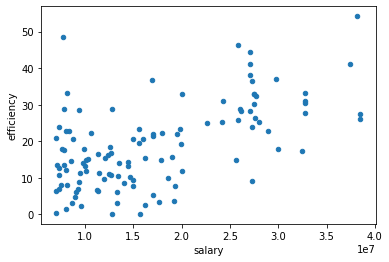

In [6]:
df = pd.read_sql_query("SELECT p.salary, p.efficiency FROM Players as p WHERE games_played >19 AND salary > (6.998587e+06)", db_control)
salary_efficiency = df.plot(kind='scatter', x='salary', y='efficiency')
salary_efficiency

This table show the relationship between salary and efficiency. Players played over 19 games and got paid higher than the average salary of the NBA.

As the scatter plot show, most of the time the higher efficiency the higher, the player got paid, which sounds pretty reasonable.

As expected that the highest efficiecy and salary is James Harden. Otherwise, there will be more than 2 players that have higher efficiency than the GOAT Michael Jordan based on what Daryl Morey said.

Besides, the one that has high efficiency but low salary player was Luka Doncic, who is really having a high performance this year and ROY (Rookie of the Year 2019) on previous year.

In [7]:
df = pd.read_sql_query("SELECT AVG(efficiency) FROM Players", db_control)
df.head(1)

,AVG(efficiency)
0,11.91362


This table shows the average efficiency value in the NBA.
In the following, I would like to know the medium efficiency value and the player.

In [21]:
df = pd.read_sql_query("SELECT name, efficiency FROM Players WHERE games_played >19 ORDER BY efficiency LIMIT 1 OFFSET (SELECT COUNT(*) FROM Players WHERE games_played >19) / 2", db_control)
df.head()

,name,efficiency
0,Coby White,8.650446


This table shows that NBA Player Coby White has the medium efficiency, which below average, in the NBA.
In the following table, I would like to know the scatter plot of the efficiency.

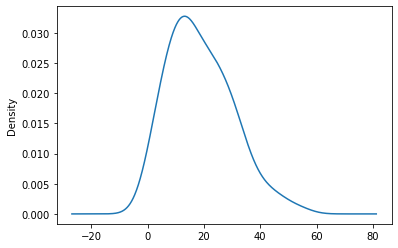

In [8]:
df = pd.read_sql_query("SELECT p.salary, p.efficiency FROM Players as p WHERE games_played >19 AND salary > (6.998587e+06)", db_control)
efficiency_density = df['efficiency'].plot(kind='kde')
efficiency_density

In the following table, I would like to know the top 30 low-efficiency NBA player.

In [9]:
df = pd.read_sql_query("SELECT p.name, p.salary, p.efficiency, p.team, a.name FROM Players as p JOIN Agents as a WHERE games_played > 10 AND a.id = p.agents_id AND salary > (6.998587e+06) ORDER BY efficiency ASC ", db_control)
df.head(30)

,name,salary,efficiency,team,name
0,Chandler Parsons,25102512,0.156600,Atlanta Hawks,James Dunleavy
1,Courtney Lee,12759670,0.158478,Dallas Mavericks,James Dunleavy
2,Deandre Ayton,9562920,0.235300,Phoenix Suns,Nima Namakian
3,James Johnson,15349400,0.237289,Miami Heat,Andy Shiffman
4,Brandon Knight,15643750,0.242413,Cleveland Cavaliers,Darren 'Mats' Matsubara
5,DeMarre Carroll,7000000,0.381287,San Antonio Spurs,Mark Bartelstein
6,Dante Exum,9600000,0.697000,Utah Jazz,Brandon Rosenthal
7,Ian Mahinmi,15450051,1.338491,Washington Wizards,Bouna Ndiaye
8,Wayne Ellington,8000000,1.449382,New York Knicks,Mark Bartelstein
9,Matthew Dellavedova,9607500,2.181300,Cleveland Cavaliers,Bill Duffy


This table is the top 30 NBA players that got paid higher than the average salary of the NBA. 
As I expected that KCP (Kentavious Caldwell-Pope), who had been pain a lot as a Lakers player, are on the the list.

Most of the players in the list are the ones that are on a bad team, based on the standing. However, currently KCP are on the Lakers, which had the best standing in the league. KCP'S efficiency are below aveage but got paid way more than the average of the league.

In the following table, I would like to know the corresponding amount of top 30 low-efficiency players based on each agent.

In [10]:
df = pd.read_sql_query("SELECT a.name, COUNT(DISTINCT p.name) FROM Players as p JOIN Agents as a WHERE p.games_played > 19 AND a.id = p.agents_id AND salary > (6.998587e+06) AND p.efficiency < 11.91362 GROUP BY a.name ORDER BY COUNT (DISTINCT p.name) DESC", db_control)
df.head(10)

,name,COUNT(DISTINCT p.name)
0,Mark Bartelstein,5
1,Rich Paul,4
2,Greg Lawrence,2
3,Jason Ranne,2
4,Zach Kurtin,2
5,Aaron Mintz,1
6,Andy Shiffman,1
7,Austin Brown,1
8,Austin Walton,1
9,Aylton Tesch,1


This table is the ranking of the agents that are able to get the best contract for their low-efficiency NBA players (clients).

Also, KCP's agent is Rich Paul, who is the top 2 agent in the table.

Long story short, if NBA players are not excelled at their work, they should really take a look at the above list and find the best agent for their career!

In [11]:
df = pd.read_sql_query("SELECT a.name, p.name FROM Players as p JOIN Agents as a WHERE a.name = 'Mark Bartelstein' AND p.games_played > 19 AND a.id = p.agents_id AND salary > (6.998587e+06) AND p.efficiency < 11.91362  ORDER BY a.name ", db_control)
df.head(5)

,name,name
0,Mark Bartelstein,Joe Ingles
1,Mark Bartelstein,Taj Gibson
2,Mark Bartelstein,E'Twaun Moore
3,Mark Bartelstein,Wayne Ellington
4,Mark Bartelstein,DeMarre Carroll


These are players that didn't do well at their work this year, but paid well, credited to Agent Mark Bartelstein.

At first, I thought there won't be a agent that's better than Rich Paul, who is KCP's agent. Then, here comes agent Mark Bartelstein. 

In [12]:
df = pd.read_sql_query("SELECT a.name, p.name FROM Players as p JOIN Agents as a WHERE a.name = 'Rich Paul' AND p.games_played > 19 AND a.id = p.agents_id AND salary > (6.998587e+06) AND p.efficiency < 11.91362  ORDER BY a.name ", db_control)
df.head(5)

,name,name
0,Rich Paul,Draymond Green
1,Rich Paul,Jordan Clarkson
2,Rich Paul,Cory Joseph
3,Rich Paul,Kentavious Caldwell-Pope


These are the players, whose agent is Rich Paul, also Lebron James's agent. Draymond Green, Jordan Clarkson, Corry Joseph and KCP all got paid than the average NBA salary, but with low performance (efficiency) this season by far.


In [17]:
df = pd.read_sql_query("SELECT p.team, SUM(p.efficiency) FROM Players as p WHERE p.games_played > 19 GROUP BY p.team ORDER BY SUM(efficiency) DESC", db_control)
df.head(30)

,team,SUM(p.efficiency)
0,Houston Rockets,159.902614
1,Dallas Mavericks,150.811580
2,Denver Nuggets,146.869545
3,Boston Celtics,145.650824
4,Washington Wizards,136.870828
5,Philadelphia 76ers,135.132408
6,San Antonio Spurs,134.764699
7,Utah Jazz,132.620267
8,Portland Trail Blazers,132.525084
9,Miami Heat,129.408799


This table presents every team's total efficiency, which only sums up the frequent registered player on the roster. 
Therefore, the table are able to compare whether it has relationship with the current team standings.

For your reference, https://www.espn.com/nba/standings.

The following table presents the top 15 agents that have the most amount of contracts with the NBA players.

In [26]:
df = pd.read_sql_query("SELECT a.name, COUNT(DISTINCT p.name) FROM Players as p JOIN Agents as a WHERE a.id = p.agents_id  GROUP BY a.name ORDER BY COUNT (DISTINCT p.name) DESC", db_control)
df.head(15)

,name,COUNT(DISTINCT p.name)
0,Jeff Schwartz,21
1,Rich Paul,21
2,Mark Bartelstein,18
3,Bill Duffy,16
4,Austin Brown,14
5,Aaron Mintz,12
6,Jordan Gertler,11
7,Leon Rose,11
8,Mike Lindeman,11
9,Sean Kennedy,11


Accoring to the table, both Rich Paul and Mark Bartelstein are in top 3 agents.

I would like to know the top agents that had the largest amount contract in total.

In [27]:
df = pd.read_sql_query("SELECT a.name, SUM(p.salary) FROM Players as p JOIN Agents as a WHERE a.id = p.agents_id  GROUP BY a.name ORDER BY SUM(p.salary) DESC", db_control)
df.head(15)

,name,SUM(p.salary)
0,Jeff Schwartz,269537835
1,Rich Paul,230473233
2,Aaron Mintz,141982564
3,Mark Bartelstein,136767245
4,Bill Duffy,133970586
5,Leon Rose,127642124
6,Steve Heumann,101941607
7,Bouna Ndiaye,92920408
8,Jeff Austin,87373588
9,Austin Brown,85525680


Accoring to the table, both Rich Paul and Mark Bartelstein are in top 4 agents in value of the total contract.

In conclusion, finding the best agent for low-efficiency basketball performance NBA player is the most genius option for their career.